In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing

from scipy import stats
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

----



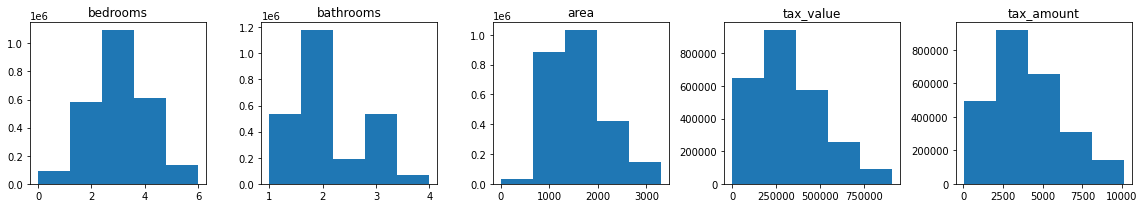

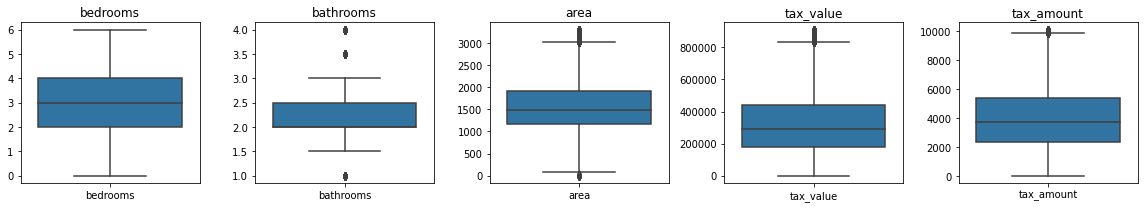

In [2]:
# First things First, let's load up the dataset, with our wrangle def
# Was going to try with substituting year like teacher did. without is saved as a .csv from previous notebook
train, validate, test = wrangle_zillow()


In [3]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
359618,2.0,2.0,1271.0,337583.0,1982.0,4145.58,6037.0
2364888,4.0,3.0,2671.0,215041.0,1964.0,2895.49,6037.0
261280,4.0,3.0,2076.0,386870.0,1939.0,4696.68,6037.0
1758266,1.0,1.0,682.0,176839.0,1974.0,2237.96,6059.0
798177,3.0,1.0,1178.0,277027.0,1950.0,3546.20,6037.0


In [4]:
# We managed it! Yay!!

- Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


- Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


- Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


- Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


- Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!